In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
import calendar
import numpy as np

%matplotlib inline

In [2]:
crisis_df = pd.read_csv('../data/Crisis_2020_redacted.csv', engine='python')

In [3]:
crisis_2019 = pd.read_csv('../data/crisis_2019_redacted.csv', engine='python')

In [4]:
crisis_df.shape

(22326, 153)

In [5]:
crisis_df.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,Risk Assessment - S1: Individual screened for mental health or related intervention,Risk Assessment - Suicidal SLAPs,Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,82699332,Crisis,NaN,12/31/2020 23:40,12/31/2020 23:53,13,3769693,116928,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,82689642,Crisis,NaN,12/31/2020 22:31,12/31/2020 23:00,29,-1,136748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,82688780,Crisis,NaN,12/31/2020 21:32,12/31/2020 22:02,30,-1,139345,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,82688656,Crisis,NaN,12/31/2020 21:27,12/31/2020 21:43,16,-1,136748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
4,82688670,Crisis,NaN,12/31/2020 21:19,12/31/2020 21:26,7,-1,139345,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


In [6]:
crisis_df.tail()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,Risk Assessment - S1: Individual screened for mental health or related intervention,Risk Assessment - Suicidal SLAPs,Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
22321,69492892,Crisis,NaN,1/1/2020 5:14,1/1/2020 5:28,14,1029822,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22322,69492741,Crisis,NaN,1/1/2020 4:45,1/1/2020 5:05,20,-1,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22323,69492019,Crisis,NaN,1/1/2020 3:00,1/1/2020 3:18,18,-1,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22324,69492070,Crisis,NaN,1/1/2020 1:45,1/1/2020 1:49,4,-1,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22325,69492055,Crisis,NaN,1/1/2020 0:04,1/1/2020 0:05,1,-1,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
crisis_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 153 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   CallReportNum                                                                                                     22326 non-null  int64  
 1   ReportVersion                                                                                                     22326 non-null  object 
 2   LinkedToCallReportNum                                                                                             0 non-null      float64
 3   CallDateAndTimeStart                                                                                              22326 non-null  object 
 4   CallDateAndTimeEnd         

In [8]:
crisis_df.isnull().sum()

CallReportNum                                                                                       0
ReportVersion                                                                                       0
LinkedToCallReportNum                                                                           22326
CallDateAndTimeStart                                                                                0
CallDateAndTimeEnd                                                                                  0
                                                                                                ...  
Suicide Assessment - Have you ever attempted to kill yourself?                                  22326
Suicide Assessment - Have you thought about suicide in the last two months?                     22326
Suicide Assessment - Suicide in progress?                                                       22326
Transfer Information - Were you transferred to this line from another crisis line 

#### CityName column is #16

In [9]:
crisis_df.CityName.value_counts()

Nashville         3614
Hendersonville     608
Madison            540
Murfreesboro       502
Brownsville        471
                  ... 
Pamplin              1
Metuchen             1
Petersburg           1
Lynden               1
Palmer               1
Name: CityName, Length: 401, dtype: int64

In [10]:
crisis_df.CityName.nunique()

401

In [11]:
crisis_df.CityName.isnull().sum()

11353

In [12]:
crisis_df.CityName.dtype

dtype('O')

#### CountyName column is #17

In [13]:
crisis_df.CountyName.value_counts()

Davidson    4383
Sumner       686
Haywood      472
Shelby       465
Hawkins      453
            ... 
Columbia       1
Kent           1
Delaware       1
Loudoun        1
Somerset       1
Name: CountyName, Length: 296, dtype: int64

In [14]:
crisis_df.CountyName.nunique()

296

In [15]:
crisis_df.CountyName.isnull().sum()

11315

In [16]:
crisis_df.CountyName.dtype

dtype('O')

#### StateProvince column is #18

In [17]:
crisis_df.StateProvince.value_counts()

TN    20418
WI      350
TX      227
MN      132
KS      117
KY      111
MS       98
FL       85
GA       74
WY       58
IN       57
CA       52
OK       42
AL       39
OR       37
IL       35
NV       31
NY       30
PA       26
NE       23
OH       23
VA       20
NJ       19
NC       15
BC       15
AZ       15
MD       14
MI       13
MA       12
WA       12
CO        8
MO        8
NM        8
LA        7
CT        5
AK        4
AR        4
RI        3
WV        3
SC        3
IA        3
HI        2
MT        2
ID        2
UT        1
ME        1
NH        1
QC        1
ND        1
PR        1
Name: StateProvince, dtype: int64

In [18]:
crisis_df.StateProvince.nunique()

50

In [19]:
crisis_df.StateProvince.isnull().sum()

58

#### CountryName is column #19

In [20]:
crisis_df.CountryName.value_counts()

United States    11025
Canada              16
Name: CountryName, dtype: int64

In [21]:
crisis_df.CountryName.isnull().sum()

11285

#### CRISIS Success Story - Does this call have a success story? If so please describe: is column #55

In [22]:
crisis_df['CRISIS Success Story - Does this call have a success story? If so please describe:'].value_counts()

Good call.                                                                                        13
It was a good call.                                                                                4
Caller thanked me for the follow up call.                                                          2
Caller thanked me for the referrals                                                                2
Caller hung up                                                                                     2
                                                                                                  ..
The caller was appreciative of the resource.  Successful call.                                     1
Good call.  Caller needed to express herself and her frustrations with her children.               1
I want to thank you Simone for saving my life yesterday by your support and encouraging words.     1
Received the services from SAMSHA.                                                         

In [23]:
crisis_df['CRISIS Success Story - Does this call have a success story? If so please describe:'].nunique()

486

In [24]:
crisis_df['CRISIS Success Story - Does this call have a success story? If so please describe:'].isnull().sum()

21820

In [25]:
crisis_df.describe()

,CallReportNum,LinkedToCallReportNum,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,...,Phone Line - SAMHSA - White House Letter,Referrals - R1: Referred to mental health services,Risk Assessment - S1: Individual screened for mental health or related intervention,Risk Assessment - Suicidal SLAPs,Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?
count,2.232600e+04,0.0,22326.000000,2.232600e+04,22326.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.640720e+07,NaN,11.023515,5.778908e+05,116599.053256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.750022e+06,NaN,10.675267,9.900594e+05,32237.563946,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.949202e+07,NaN,0.000000,-1.000000e+00,53133.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.326773e+07,NaN,2.000000,-1.000000e+00,88564.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.664349e+07,NaN,9.000000,-1.000000e+00,136748.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.960700e+07,NaN,15.000000,1.031947e+06,140958.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.269933e+07,NaN,175.000000,3.835361e+06,152976.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CRISIS Demographics - Age is column # 78

In [26]:
crisis_df['CRISIS Demographics - Age'].value_counts()

56-70     3212
41-55     3052
31-40      920
25-30      636
18-24      464
13-17      267
70-85       98
12-Jul      33
85+          1
Name: CRISIS Demographics - Age, dtype: int64

In [27]:
crisis_df['CRISIS Demographics - Age'].isnull().sum()

13643

### Creating Crisis Issues DataFrame

In [28]:
crisis_issues_list = []
for c in crisis_df.columns:
    if 'Issues' in c:
        crisis_issues_list.append(c)
issues_df = crisis_df[crisis_issues_list]

In [29]:
issues_df.head()

,CRISIS Issues - Abusive Behavior,CRISIS Issues - Call Problems (specify at least 2),CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide
0,NaN,NaN,Anxious/Stressed; Job Stress; Lonely,NaN,NaN,NaN,NaN,Medical Related Anxiety,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Parent-Child; Peer Group/Friend; Therapist/Med...,NaN,NaN
2,NaN,NaN,Anxious/Stressed; Parenting Stress; Overwhelmed,NaN,NaN,NaN,NaN,Other Mental Health,NaN,NaN,Parent-Child; Other Relationships,NaN,NaN
3,NaN,NaN,Anger/Hostility,NaN,NaN,NaN,NaN,Anxiety/Panic; Paranoia,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Anger/Hostility; Overwhelmed,NaN,NaN,NaN,NaN,Other Mental Health,NaN,NaN,Crisis Counselor; Conflict With Other,NaN,NaN


In [30]:
crisis_df[['Date','Time']] = crisis_df['CallDateAndTimeStart'].str.split(" ",n=1, expand=True)
crisis_df.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,Date,Time
0,82699332,Crisis,NaN,12/31/2020 23:40,12/31/2020 23:53,13,3769693,116928,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,23:40
1,82689642,Crisis,NaN,12/31/2020 22:31,12/31/2020 23:00,29,-1,136748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,22:31
2,82688780,Crisis,NaN,12/31/2020 21:32,12/31/2020 22:02,30,-1,139345,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,21:32
3,82688656,Crisis,NaN,12/31/2020 21:27,12/31/2020 21:43,16,-1,136748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,21:27
4,82688670,Crisis,NaN,12/31/2020 21:19,12/31/2020 21:26,7,-1,139345,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,21:19


### Dropped columns will all NaN values

In [31]:
crisis_df_new = crisis_df.dropna(axis=1, how='all')
crisis_df_new.head()

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CRISIS/LIFELINE Imminent Risk - 6. If yes to #4 were emergency services dispatched?,CRISIS/LIFELINE Imminent Risk - 7. Third-party caller concerned about homicidal ideation in another person,CRISIS/LIFELINE Imminent Risk - Was suicidal ideation present?,CRISIS/LIFLINE THIRD-PARTY IMMINENT RISK - Imminent risk for suicide for third party call?,NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,Date,Time
0,82699332,Crisis,12/31/2020 23:40,12/31/2020 23:53,13,3769693,116928,Houston,Harris,TX,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,23:40
1,82689642,Crisis,12/31/2020 22:31,12/31/2020 23:00,29,-1,136748,NaN,NaN,TN,...,NaN,NaN,c. No,NaN,NaN,NaN,No,NaN,12/31/2020,22:31
2,82688780,Crisis,12/31/2020 21:32,12/31/2020 22:02,30,-1,139345,NaN,NaN,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,21:32
3,82688656,Crisis,12/31/2020 21:27,12/31/2020 21:43,16,-1,136748,NaN,NaN,TN,...,NaN,NaN,c. No,NaN,NaN,NaN,No,NaN,12/31/2020,21:27
4,82688670,Crisis,12/31/2020 21:19,12/31/2020 21:26,7,-1,139345,Marysville,Snohomish,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,12/31/2020,21:19


In [32]:
crisis_df_new.shape

(22326, 84)

In [33]:
crisis_df_new['Month'] = pd.DatetimeIndex(crisis_df_new['Date']).month

<ipython-input-33-e0ba2d9108eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_df_new['Month'] = pd.DatetimeIndex(crisis_df_new['Date']).month


In [34]:
crisis_df_new['Day'] = pd.DatetimeIndex(crisis_df_new['Date']).day

<ipython-input-34-067213c5ecc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_df_new['Day'] = pd.DatetimeIndex(crisis_df_new['Date']).day


In [35]:
crisis_df_new['Year'] = pd.DatetimeIndex(crisis_df_new['Date']).year

<ipython-input-35-5f4c6154ee58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_df_new['Year'] = pd.DatetimeIndex(crisis_df_new['Date']).year


In [36]:
crisis_df_new.head()

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CRISIS/LIFLINE THIRD-PARTY IMMINENT RISK - Imminent risk for suicide for third party call?,NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,Date,Time,Month,Day,Year
0,82699332,Crisis,12/31/2020 23:40,12/31/2020 23:53,13,3769693,116928,Houston,Harris,TX,...,NaN,NaN,NaN,No,NaN,12/31/2020,23:40,12,31,2020
1,82689642,Crisis,12/31/2020 22:31,12/31/2020 23:00,29,-1,136748,NaN,NaN,TN,...,NaN,NaN,NaN,No,NaN,12/31/2020,22:31,12,31,2020
2,82688780,Crisis,12/31/2020 21:32,12/31/2020 22:02,30,-1,139345,NaN,NaN,TN,...,NaN,NaN,NaN,No,NaN,12/31/2020,21:32,12,31,2020
3,82688656,Crisis,12/31/2020 21:27,12/31/2020 21:43,16,-1,136748,NaN,NaN,TN,...,NaN,NaN,NaN,No,NaN,12/31/2020,21:27,12,31,2020
4,82688670,Crisis,12/31/2020 21:19,12/31/2020 21:26,7,-1,139345,Marysville,Snohomish,WA,...,NaN,NaN,NaN,No,NaN,12/31/2020,21:19,12,31,2020


In [37]:
crisis_date_df = crisis_df_new[['CallReportNum','Date','Time','Month','Day','Year']]
crisis_date_df.head()

,CallReportNum,Date,Time,Month,Day,Year
0,82699332,12/31/2020,23:40,12,31,2020
1,82689642,12/31/2020,22:31,12,31,2020
2,82688780,12/31/2020,21:32,12,31,2020
3,82688656,12/31/2020,21:27,12,31,2020
4,82688670,12/31/2020,21:19,12,31,2020


In [38]:
d = dict(enumerate(calendar.month_abbr))
crisis_date_df['Month'] = crisis_date_df['Month'].map(d)
crisis_date_df.head()

<ipython-input-38-14a148073abb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_date_df['Month'] = crisis_date_df['Month'].map(d)


,CallReportNum,Date,Time,Month,Day,Year
0,82699332,12/31/2020,23:40,Dec,31,2020
1,82689642,12/31/2020,22:31,Dec,31,2020
2,82688780,12/31/2020,21:32,Dec,31,2020
3,82688656,12/31/2020,21:27,Dec,31,2020
4,82688670,12/31/2020,21:19,Dec,31,2020


In [39]:
crisis_date_df['Month_Num'] = pd.DatetimeIndex(crisis_date_df['Date']).month
crisis_date_df.head()

<ipython-input-39-65eb9c2a1a0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_date_df['Month_Num'] = pd.DatetimeIndex(crisis_date_df['Date']).month


,CallReportNum,Date,Time,Month,Day,Year,Month_Num
0,82699332,12/31/2020,23:40,Dec,31,2020,12
1,82689642,12/31/2020,22:31,Dec,31,2020,12
2,82688780,12/31/2020,21:32,Dec,31,2020,12
3,82688656,12/31/2020,21:27,Dec,31,2020,12
4,82688670,12/31/2020,21:19,Dec,31,2020,12


In [40]:
crisis_date_df = crisis_date_df.sort_values(by = 'Month_Num', ascending = True)
crisis_date_df.head()

,CallReportNum,Date,Time,Month,Day,Year,Month_Num
22325,69492055,1/1/2020,0:04,Jan,1,2020,1
21417,70155171,1/22/2020,13:05,Jan,22,2020,1
21418,70146428,1/22/2020,13:02,Jan,22,2020,1
21419,70144952,1/22/2020,12:21,Jan,22,2020,1
21420,70142449,1/22/2020,12:18,Jan,22,2020,1


### Created chart for all the calls per month

In [41]:
month_dict = {}
for i in crisis_date_df['Month']:
    if i in month_dict.keys():
        month_dict[i] += 1
    else:
        month_dict[i] = 1

In [42]:
month_dict

{'Jan': 1354,
 'Feb': 1335,
 'Mar': 1724,
 'Apr': 1690,
 'May': 1846,
 'Jun': 1879,
 'Jul': 2160,
 'Aug': 2122,
 'Sep': 2034,
 'Oct': 2139,
 'Nov': 2079,
 'Dec': 1964}

In [43]:
calls_month_2020 = pd.DataFrame(month_dict,index=[0])
calls_month_2020

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1354,1335,1724,1690,1846,1879,2160,2122,2034,2139,2079,1964


In [44]:
calls_month_2020 = calls_month_2020.T.reset_index()

In [45]:
calls_month_2020

,index,0
0,Jan,1354
1,Feb,1335
2,Mar,1724
3,Apr,1690
4,May,1846
5,Jun,1879
6,Jul,2160
7,Aug,2122
8,Sep,2034
9,Oct,2139


In [46]:
calls_month_2020 = calls_month_2020.rename(columns = {'index':'Month',0:'number_calls'})
calls_month_2020

,Month,number_calls
0,Jan,1354
1,Feb,1335
2,Mar,1724
3,Apr,1690
4,May,1846
5,Jun,1879
6,Jul,2160
7,Aug,2122
8,Sep,2034
9,Oct,2139


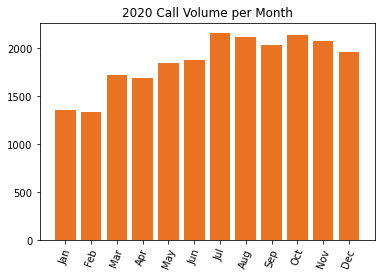

In [47]:
month = list(month_dict.keys())
count = list(month_dict.values())

plt.bar(range(len(month_dict)),count,tick_label=month, color = '#e97223')
plt.xticks(rotation = 70)
plt.title('2020 Call Volume per Month')
plt.savefig('calls_per_month.png');

### Create a group by statement in order to plot the number of calls per day for each month

In [48]:
calls_by_day = crisis_date_df.groupby(['Month_Num','Month','Day'], as_index=False)['CallReportNum'].count()
calls_by_day = calls_by_day.rename(columns = {'CallReportNum': 'number_calls'})
calls_by_day

,Month_Num,Month,Day,number_calls
0,1,Jan,1,33
1,1,Jan,2,29
2,1,Jan,3,45
3,1,Jan,4,26
4,1,Jan,5,40
...,...,...,...,...
361,12,Dec,27,57
362,12,Dec,28,60
363,12,Dec,29,71
364,12,Dec,30,75


### Let's look at January only

In [49]:
jan = calls_by_day[calls_by_day.Month == 'Jan']
jan.head()

,Month_Num,Month,Day,number_calls
0,1,Jan,1,33
1,1,Jan,2,29
2,1,Jan,3,45
3,1,Jan,4,26
4,1,Jan,5,40


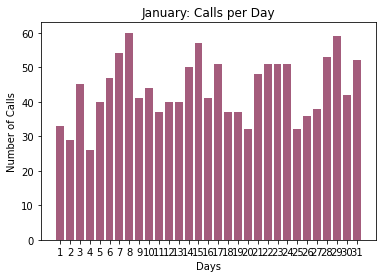

In [50]:
plt.bar(jan.Day, jan.number_calls, linewidth=2, color='#a45c7c')
plt.rcParams["figure.figsize"] = [15,10]
plt.xticks(range(1, 32))
plt.xlabel('Days')
plt.ylabel('Number of Calls')
plt.title('January: Calls per Day');

### Now let's create a groupby for Feb, March etc...

In [51]:
feb = calls_by_day[calls_by_day.Month == 'Feb']
mar = calls_by_day[calls_by_day.Month == 'Mar']
apr = calls_by_day[calls_by_day.Month == 'Apr']
may = calls_by_day[calls_by_day.Month == 'May']
june = calls_by_day[calls_by_day.Month == 'Jun']
july = calls_by_day[calls_by_day.Month == 'Jul']
aug = calls_by_day[calls_by_day.Month == 'Aug']
sep = calls_by_day[calls_by_day.Month == 'Sep']
octo = calls_by_day[calls_by_day.Month == 'Oct']
nov = calls_by_day[calls_by_day.Month == 'Nov']
dec = calls_by_day[calls_by_day.Month == 'Dec']

### Massive facet grid for 2020 Call Volume per Month

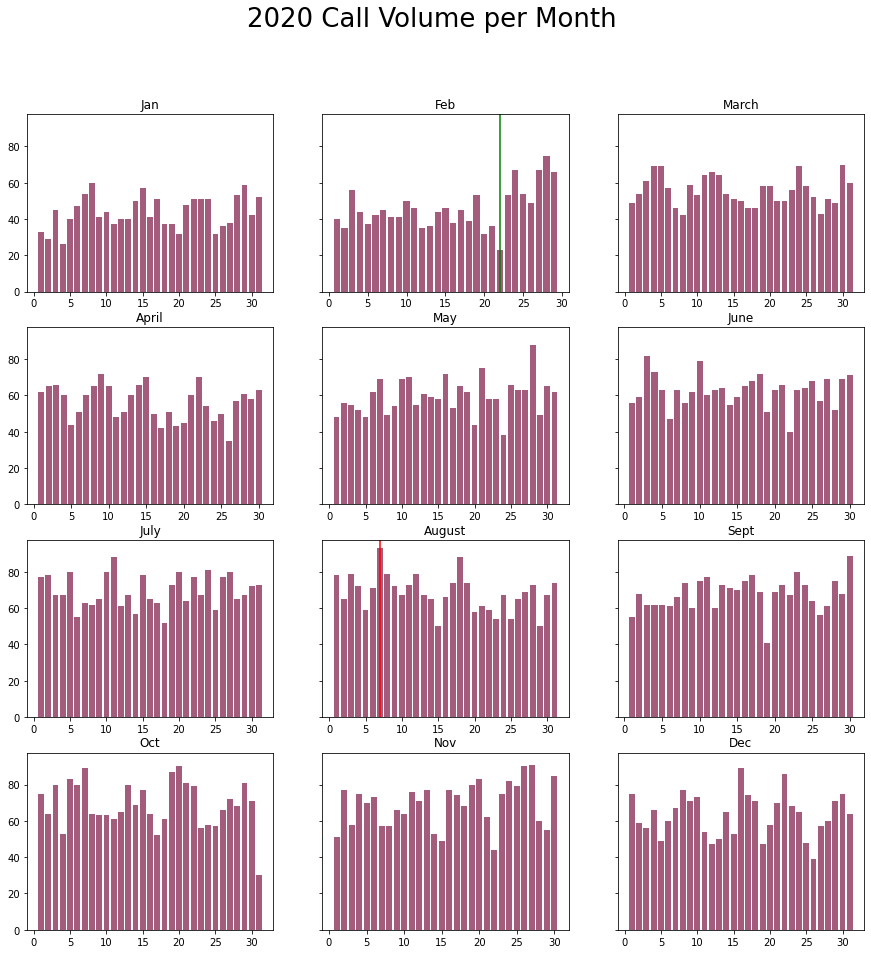

In [52]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows = 4, ncols = 3, sharey=True, figsize=(15,15))
#fig.subplots_adjust(wspace=0.05)
#plt.figure(figsize=(25,45))
fig.suptitle('2020 Call Volume per Month', fontsize=26)
ax1.set_title('Jan')
ax1.bar(jan.Day, jan.number_calls, color='#a45c7c')#, color='green',edgecolor='black', label='28,501')
#ax1.set_xticks(range(1,31, 1))

ax2.bar(feb.Day, feb.number_calls, color='#a45c7c')#, edgecolor='black', label='5,972,641')
ax2.set_title('Feb')
ax2.axvline(x=22, color='green') # Vertical green bar shows the day with the lowest received calls out of the year -23-

ax3.bar(mar.Day, mar.number_calls, color='#a45c7c')
ax3.set_title('March')


ax4.bar(apr.Day, apr.number_calls, color='#a45c7c')
ax4.set_title('April')

ax5.bar(may.Day, may.number_calls, color='#a45c7c')
ax5.set_title('May')

ax6.bar(june.Day, june.number_calls, color='#a45c7c')
ax6.set_title('June')

ax7.bar(july.Day, july.number_calls, color='#a45c7c')
ax7.set_title('July')

ax8.bar(aug.Day, aug.number_calls, color='#a45c7c')
ax8.set_title('August')
ax8.axvline(x=7, color='red') # Vertical red bar shows the day with the highest received calls out of the year -93-

ax9.bar(sep.Day, sep.number_calls, color='#a45c7c')
ax9.set_title('Sept')

ax10.bar(octo.Day, octo.number_calls, color='#a45c7c')
ax10.set_title('Oct')

ax11.bar(nov.Day, nov.number_calls, color='#a45c7c')
ax11.set_title('Nov')


ax12.bar(dec.Day, dec.number_calls, color='#a45c7c')
ax12.set_title('Dec')


#fig.text(0.48, -0.01, 'columns name', fontsize=20, ha='center')
#fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=20)
#fig.legend(loc="upper left", fontsize=20)
#plt.axhline(y=350, linestyle='--', color='red', label = 'Weekday average')
#plt.axvline(x=38, color='red')
plt.yticks(fontsize=60);
plt.savefig('call_volume.png');

### Create a data frame with city name, county name, state, and country

In [53]:
crisis_df_new.head()

,CallReportNum,ReportVersion,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CRISIS/LIFLINE THIRD-PARTY IMMINENT RISK - Imminent risk for suicide for third party call?,NSPL Phone Line - NSPL - Did you complete a warm transfer to the Veterans Crisis Line?,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?,Date,Time,Month,Day,Year
0,82699332,Crisis,12/31/2020 23:40,12/31/2020 23:53,13,3769693,116928,Houston,Harris,TX,...,NaN,NaN,NaN,No,NaN,12/31/2020,23:40,12,31,2020
1,82689642,Crisis,12/31/2020 22:31,12/31/2020 23:00,29,-1,136748,NaN,NaN,TN,...,NaN,NaN,NaN,No,NaN,12/31/2020,22:31,12,31,2020
2,82688780,Crisis,12/31/2020 21:32,12/31/2020 22:02,30,-1,139345,NaN,NaN,TN,...,NaN,NaN,NaN,No,NaN,12/31/2020,21:32,12,31,2020
3,82688656,Crisis,12/31/2020 21:27,12/31/2020 21:43,16,-1,136748,NaN,NaN,TN,...,NaN,NaN,NaN,No,NaN,12/31/2020,21:27,12,31,2020
4,82688670,Crisis,12/31/2020 21:19,12/31/2020 21:26,7,-1,139345,Marysville,Snohomish,WA,...,NaN,NaN,NaN,No,NaN,12/31/2020,21:19,12,31,2020


In [54]:
crisis_states = crisis_df_new[['CallReportNum','StateProvince','Date','Time','Month','Day','Year']]
crisis_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
0,82699332,TX,12/31/2020,23:40,12,31,2020
1,82689642,TN,12/31/2020,22:31,12,31,2020
2,82688780,TN,12/31/2020,21:32,12,31,2020
3,82688656,TN,12/31/2020,21:27,12,31,2020
4,82688670,WA,12/31/2020,21:19,12,31,2020


In [55]:
crisis_states.tail()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
22321,69492892,TN,1/1/2020,5:14,1,1,2020
22322,69492741,TN,1/1/2020,4:45,1,1,2020
22323,69492019,TN,1/1/2020,3:00,1,1,2020
22324,69492070,TN,1/1/2020,1:45,1,1,2020
22325,69492055,TN,1/1/2020,0:04,1,1,2020


### Data frame with only TN calls

In [56]:
crisis_tn = crisis_states.loc[crisis_states.StateProvince == 'TN']
crisis_tn.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
1,82689642,TN,12/31/2020,22:31,12,31,2020
2,82688780,TN,12/31/2020,21:32,12,31,2020
3,82688656,TN,12/31/2020,21:27,12,31,2020
5,82688455,TN,12/31/2020,21:12,12,31,2020
6,82688287,TN,12/31/2020,21:05,12,31,2020


In [57]:
crisis_tn.tail()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
22321,69492892,TN,1/1/2020,5:14,1,1,2020
22322,69492741,TN,1/1/2020,4:45,1,1,2020
22323,69492019,TN,1/1/2020,3:00,1,1,2020
22324,69492070,TN,1/1/2020,1:45,1,1,2020
22325,69492055,TN,1/1/2020,0:04,1,1,2020


### Changing the month number to names

In [58]:
d = dict(enumerate(calendar.month_abbr))
crisis_tn['Month'] = crisis_tn['Month'].map(d)
crisis_tn.head()

<ipython-input-58-c185c39b7da0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_tn['Month'] = crisis_tn['Month'].map(d)


,CallReportNum,StateProvince,Date,Time,Month,Day,Year
1,82689642,TN,12/31/2020,22:31,Dec,31,2020
2,82688780,TN,12/31/2020,21:32,Dec,31,2020
3,82688656,TN,12/31/2020,21:27,Dec,31,2020
5,82688455,TN,12/31/2020,21:12,Dec,31,2020
6,82688287,TN,12/31/2020,21:05,Dec,31,2020


### Adding a new column with month number

In [59]:
crisis_tn['Month_Num'] = pd.DatetimeIndex(crisis_tn['Date']).month
crisis_tn.head()

<ipython-input-59-d5d64727d8a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_tn['Month_Num'] = pd.DatetimeIndex(crisis_tn['Date']).month


,CallReportNum,StateProvince,Date,Time,Month,Day,Year,Month_Num
1,82689642,TN,12/31/2020,22:31,Dec,31,2020,12
2,82688780,TN,12/31/2020,21:32,Dec,31,2020,12
3,82688656,TN,12/31/2020,21:27,Dec,31,2020,12
5,82688455,TN,12/31/2020,21:12,Dec,31,2020,12
6,82688287,TN,12/31/2020,21:05,Dec,31,2020,12


In [60]:
crisis_tn = crisis_tn.sort_values(by = 'Month_Num', ascending = True)
crisis_tn.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year,Month_Num
22325,69492055,TN,1/1/2020,0:04,Jan,1,2020,1
21423,70143319,TN,1/22/2020,10:48,Jan,22,2020,1
21424,70142786,TN,1/22/2020,10:34,Jan,22,2020,1
21425,70139829,TN,1/22/2020,10:34,Jan,22,2020,1
21426,70137157,TN,1/22/2020,9:25,Jan,22,2020,1


In [61]:
crisis_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20418 entries, 22325 to 1
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CallReportNum  20418 non-null  int64 
 1   StateProvince  20418 non-null  object
 2   Date           20418 non-null  object
 3   Time           20418 non-null  object
 4   Month          20418 non-null  object
 5   Day            20418 non-null  int64 
 6   Year           20418 non-null  int64 
 7   Month_Num      20418 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


In [62]:
month_d = {}
for i in crisis_date_df['Month']:
    if i in month_d.keys():
        month_d[i] += 1
    else:
        month_d[i] = 1
month_d

{'Jan': 1354,
 'Feb': 1335,
 'Mar': 1724,
 'Apr': 1690,
 'May': 1846,
 'Jun': 1879,
 'Jul': 2160,
 'Aug': 2122,
 'Sep': 2034,
 'Oct': 2139,
 'Nov': 2079,
 'Dec': 1964}

In [63]:
tn_calls_month = pd.DataFrame(month_d, index=[0])
tn_calls_month

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1354,1335,1724,1690,1846,1879,2160,2122,2034,2139,2079,1964


In [64]:
tn_calls_month = tn_calls_month.T.reset_index()

In [65]:
tn_calls_month

,index,0
0,Jan,1354
1,Feb,1335
2,Mar,1724
3,Apr,1690
4,May,1846
5,Jun,1879
6,Jul,2160
7,Aug,2122
8,Sep,2034
9,Oct,2139


### DataFrame for TN only. Number of calls per month

In [66]:
tn_calls_month = tn_calls_month.rename(columns = {'index': 'Month', 0:'number_calls'})
tn_calls_month

,Month,number_calls
0,Jan,1354
1,Feb,1335
2,Mar,1724
3,Apr,1690
4,May,1846
5,Jun,1879
6,Jul,2160
7,Aug,2122
8,Sep,2034
9,Oct,2139


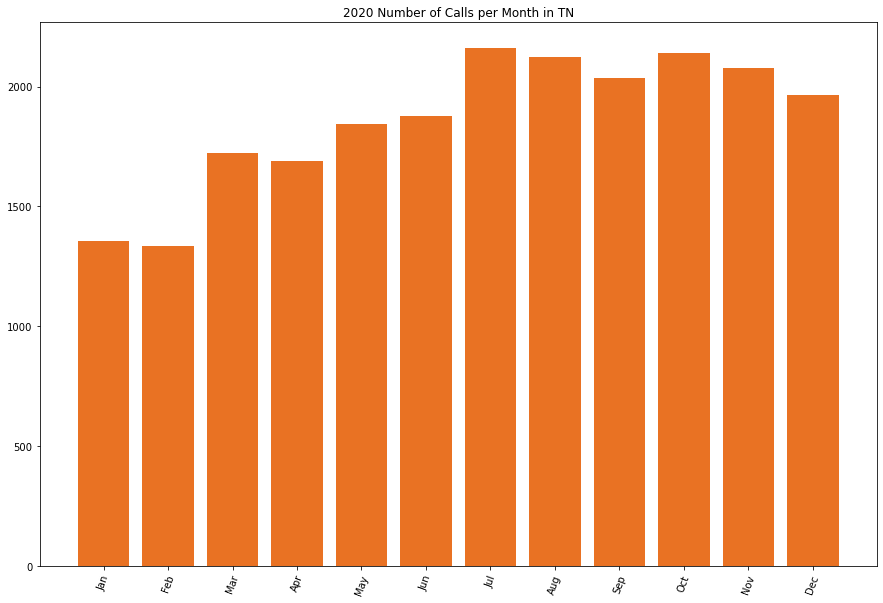

In [67]:
month_tn = list(month_d.keys())
count_tn = list(month_d.values())

plt.bar(range(len(month_d)),count_tn,tick_label=month_tn, color='#e97223')
plt.xticks(rotation = 70)
plt.title('2020 Number of Calls per Month in TN')
plt.savefig('calls_per_month_tn.png');

### Data frame with Other States calls

In [68]:
crisis_other_states = crisis_states.loc[crisis_states.StateProvince != 'TN']
crisis_other_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
0,82699332,TX,12/31/2020,23:40,12,31,2020
4,82688670,WA,12/31/2020,21:19,12,31,2020
9,82687799,WI,12/31/2020,20:38,12,31,2020
24,82684327,GA,12/31/2020,17:48,12,31,2020
31,82681308,CA,12/31/2020,15:57,12,31,2020


In [69]:
crisis_other_states = crisis_other_states.reset_index(drop=True)
crisis_other_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
0,82699332,TX,12/31/2020,23:40,12,31,2020
1,82688670,WA,12/31/2020,21:19,12,31,2020
2,82687799,WI,12/31/2020,20:38,12,31,2020
3,82684327,GA,12/31/2020,17:48,12,31,2020
4,82681308,CA,12/31/2020,15:57,12,31,2020


In [70]:
d = dict(enumerate(calendar.month_abbr))
crisis_other_states['Month'] = crisis_other_states['Month'].map(d)
crisis_other_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year
0,82699332,TX,12/31/2020,23:40,Dec,31,2020
1,82688670,WA,12/31/2020,21:19,Dec,31,2020
2,82687799,WI,12/31/2020,20:38,Dec,31,2020
3,82684327,GA,12/31/2020,17:48,Dec,31,2020
4,82681308,CA,12/31/2020,15:57,Dec,31,2020


In [71]:
crisis_other_states['Month_Num'] = pd.DatetimeIndex(crisis_other_states['Date']).month
crisis_other_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year,Month_Num
0,82699332,TX,12/31/2020,23:40,Dec,31,2020,12
1,82688670,WA,12/31/2020,21:19,Dec,31,2020,12
2,82687799,WI,12/31/2020,20:38,Dec,31,2020,12
3,82684327,GA,12/31/2020,17:48,Dec,31,2020,12
4,82681308,CA,12/31/2020,15:57,Dec,31,2020,12


In [72]:
crisis_other_states = crisis_other_states.sort_values(by = 'Month_Num', ascending = True)
crisis_other_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year,Month_Num
1907,69564571,IN,1/3/2020,14:17,Jan,3,2020,1
1876,70183991,OR,1/23/2020,13:58,Jan,23,2020,1
1875,70206989,CA,1/24/2020,9:38,Jan,24,2020,1
1874,70223920,WI,1/24/2020,19:28,Jan,24,2020,1
1873,70224193,KY,1/24/2020,19:46,Jan,24,2020,1


In [73]:
month_di = {}
for i in crisis_other_states['Month']:
    if i in month_di.keys():
        month_di[i] += 1
    else:
        month_di[i] = 1
month_di

{'Jan': 55,
 'Feb': 104,
 'Mar': 115,
 'Apr': 102,
 'May': 144,
 'Jun': 135,
 'Jul': 231,
 'Aug': 231,
 'Sep': 175,
 'Oct': 209,
 'Nov': 208,
 'Dec': 199}

In [74]:
other_calls_month = pd.DataFrame(month_di, index=[0])
other_calls_month

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,55,104,115,102,144,135,231,231,175,209,208,199


In [75]:
other_calls_month = other_calls_month.T.reset_index()

In [76]:
other_calls_month

,index,0
0,Jan,55
1,Feb,104
2,Mar,115
3,Apr,102
4,May,144
5,Jun,135
6,Jul,231
7,Aug,231
8,Sep,175
9,Oct,209


In [77]:
other_calls_month = other_calls_month.rename(columns = {'index': 'Month', 0:'number_calls'})

### DataFrame for Other States. Number of calls per month

In [78]:
other_calls_month

,Month,number_calls
0,Jan,55
1,Feb,104
2,Mar,115
3,Apr,102
4,May,144
5,Jun,135
6,Jul,231
7,Aug,231
8,Sep,175
9,Oct,209


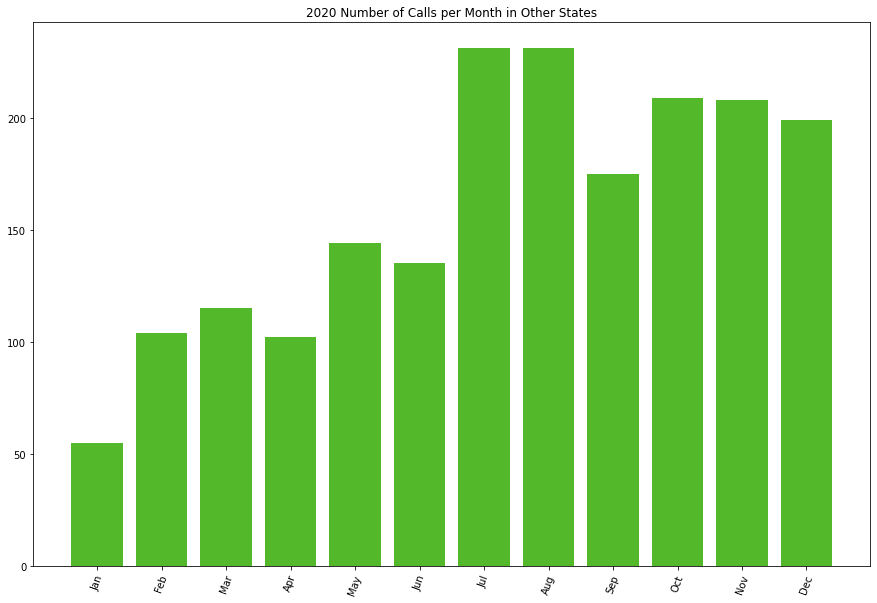

In [79]:
month_other = list(month_di.keys())
count_other = list(month_di.values())

plt.bar(range(len(month_di)),count_other,tick_label=month_other, color='#53b92b')
plt.xticks(rotation = 70)
plt.title('2020 Number of Calls per Month in Other States')
plt.savefig('calls_per_month_other_states.png');

### Create a group by statement in order to plot the number of calls per day for each month for TN only

In [80]:
calls_by_day_tn = crisis_tn.groupby(['Month_Num','Month','Day'], as_index=False)['StateProvince'].count()
calls_by_day_tn = calls_by_day_tn.rename(columns = {'StateProvince': 'number_calls'})
calls_by_day_tn

,Month_Num,Month,Day,number_calls
0,1,Jan,1,33
1,1,Jan,2,29
2,1,Jan,3,42
3,1,Jan,4,23
4,1,Jan,5,40
...,...,...,...,...
361,12,Dec,27,47
362,12,Dec,28,53
363,12,Dec,29,66
364,12,Dec,30,66


### Let's look at January only

In [81]:
jan_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Jan']
jan_tn.head()

,Month_Num,Month,Day,number_calls
0,1,Jan,1,33
1,1,Jan,2,29
2,1,Jan,3,42
3,1,Jan,4,23
4,1,Jan,5,40


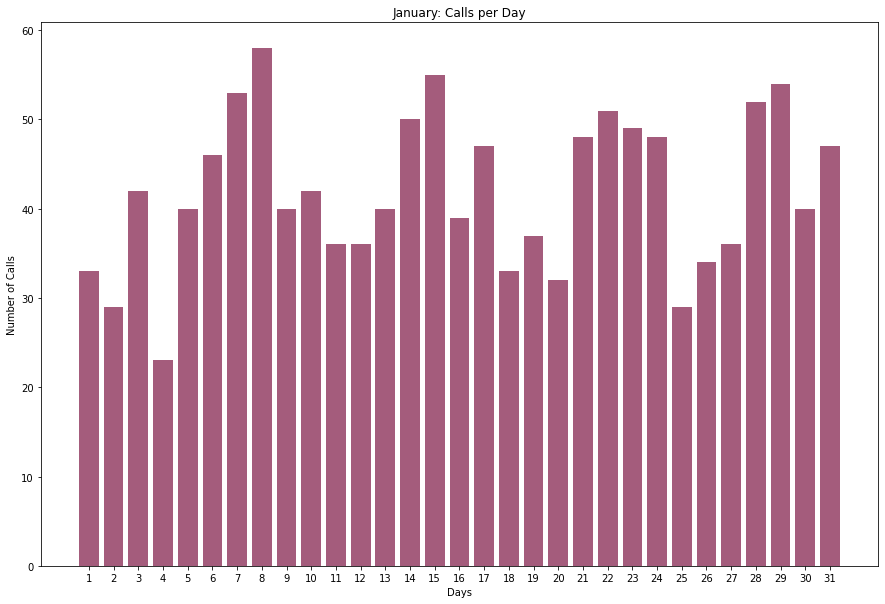

In [82]:
plt.bar(jan_tn.Day, jan_tn.number_calls, linewidth=2, color='#a45c7c')
plt.rcParams["figure.figsize"] = [15,10]
plt.xticks(range(1, 32))
plt.xlabel('Days')
plt.ylabel('Number of Calls')
plt.title('January: Calls per Day');

### Now let's create a groupby for Feb, March etc...

In [83]:
feb_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Feb']
mar_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Mar']
apr_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Apr']
may_tn = calls_by_day_tn[calls_by_day_tn.Month == 'May']
june_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Jun']
july_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Jul']
aug_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Aug']
sep_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Sep']
oct_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Oct']
nov_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Nov']
dec_tn = calls_by_day_tn[calls_by_day_tn.Month == 'Dec']

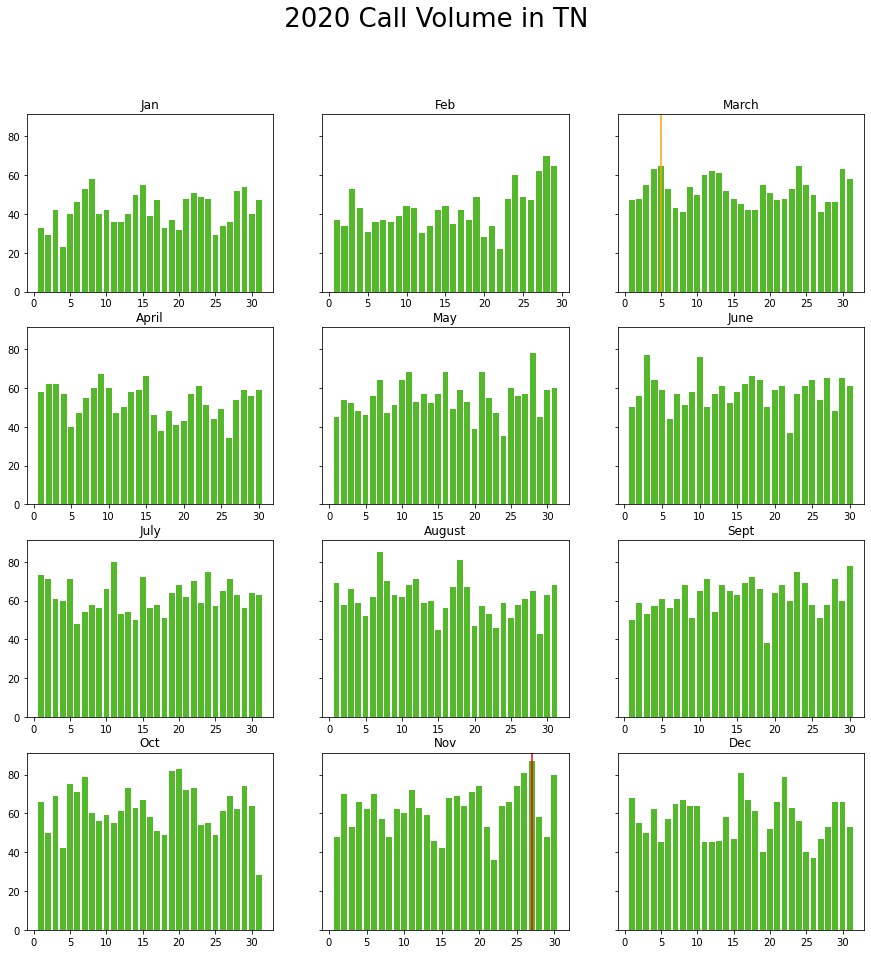

In [84]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows = 4, ncols = 3, sharey=True, figsize=(15,15))
#fig.subplots_adjust(wspace=0.05)
#plt.figure(figsize=(25,45))
fig.suptitle(' 2020 Call Volume in TN', fontsize=26)
ax1.set_title('Jan')
ax1.bar(jan_tn.Day, jan_tn.number_calls, color='#53b92b')#, color='green',edgecolor='black', label='28,501')
#ax1.set_xticks(range(1,31, 1))

ax2.bar(feb_tn.Day, feb_tn.number_calls, color='#53b92b')#, edgecolor='black', label='5,972,641')
ax2.set_title('Feb')


ax3.bar(mar_tn.Day, mar_tn.number_calls, color='#53b92b')
ax3.set_title('March')
ax3.axvline(x=5, color='orange') #TDH Announces First Case of COVID-19 in Tennessee on March 5th

ax4.bar(apr_tn.Day, apr_tn.number_calls, color='#53b92b')
ax4.set_title('April')


ax5.bar(may_tn.Day, may_tn.number_calls, color='#53b92b')
ax5.set_title('May')

ax6.bar(june_tn.Day, june_tn.number_calls, color='#53b92b')
ax6.set_title('June')


ax7.bar(july_tn.Day, july_tn.number_calls, color='#53b92b')
ax7.set_title('July')

ax8.bar(aug_tn.Day, aug_tn.number_calls, color='#53b92b')
ax8.set_title('August')

ax9.bar(sep_tn.Day, sep_tn.number_calls, color='#53b92b')
ax9.set_title('Sept')

ax10.bar(oct_tn.Day, oct_tn.number_calls, color='#53b92b')
ax10.set_title('Oct')

ax11.bar(nov_tn.Day, nov_tn.number_calls, color='#53b92b')
ax11.set_title('Nov')
ax11.axvline(x=27, color='red') # I added a vertical red bar here because they received the highest # of call -87-

ax12.bar(dec_tn.Day, dec_tn.number_calls, color='#53b92b')
ax12.set_title('Dec')


#fig.text(0.48, -0.01, 'columns name', fontsize=20, ha='center')
#fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=20)
#fig.legend(loc="upper left", fontsize=20)
#plt.axhline(y=350, linestyle='--', color='red', label = 'Weekday average')
#plt.axvline(x=38, color='red')
plt.yticks(fontsize=60);
plt.savefig('call_volume_tn.png');


In [85]:
calls_by_day_other = crisis_other_states.groupby(['Month_Num','Month','Day'], as_index=False)['StateProvince'].count()
calls_by_day_other = calls_by_day_other.rename(columns = {'StateProvince': 'number_calls'})
calls_by_day_other

,Month_Num,Month,Day,number_calls
0,1,Jan,3,3
1,1,Jan,4,3
2,1,Jan,6,1
3,1,Jan,7,1
4,1,Jan,8,2
...,...,...,...,...
351,12,Dec,27,10
352,12,Dec,28,7
353,12,Dec,29,5
354,12,Dec,30,9


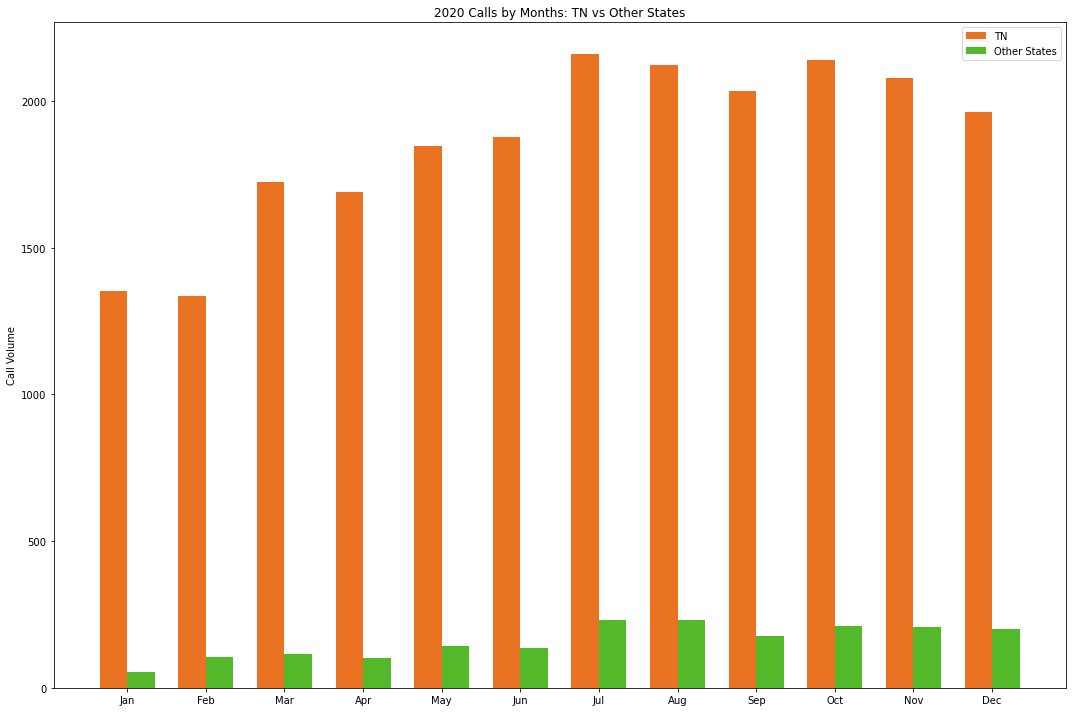

In [86]:
labels = other_calls_month.Month
tn_month_values = tn_calls_month.number_calls
other_state_month_values = other_calls_month.number_calls

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tn_month_values, width, color='#e97223', label='TN')
rects2 = ax.bar(x + width/2, other_state_month_values, width, color='#53b92b', label='Other States')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Call Volume')
ax.set_title('2020 Calls by Months: TN vs Other States')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout();
plt.savefig('call_volume_tn_vs_other.png')

### 2020 months broken down into seasons

In [87]:
calls_month_2020

,Month,number_calls
0,Jan,1354
1,Feb,1335
2,Mar,1724
3,Apr,1690
4,May,1846
5,Jun,1879
6,Jul,2160
7,Aug,2122
8,Sep,2034
9,Oct,2139


In [88]:
season_list = []
for month in calls_month_2020['Month']:
    if month in ('Dec','Jan','Feb'):
        season = 'Winter'
        season_list.append(season)
    elif month in ('Mar','Apr','May'):
        season = 'Spring'
        season_list.append(season)
    elif month in ('Jun','Jul','Aug'):
        season = 'Summer'
        season_list.append(season)
    elif month in ('Sep','Oct','Nov'):
        season = 'Fall'
        season_list.append(season)
    else:
        season = 'Winter'
        season_list.append(season)

In [89]:
calls_month_2020['Season'] = season_list
calls_month_2020

,Month,number_calls,Season
0,Jan,1354,Winter
1,Feb,1335,Winter
2,Mar,1724,Spring
3,Apr,1690,Spring
4,May,1846,Spring
5,Jun,1879,Summer
6,Jul,2160,Summer
7,Aug,2122,Summer
8,Sep,2034,Fall
9,Oct,2139,Fall


In [90]:
seasons_df = calls_month_2020.groupby('Season', as_index=False)['number_calls'].mean()
seasons_df

,Season,number_calls
0,Fall,2084.000000
1,Spring,1753.333333
2,Summer,2053.666667
3,Winter,1551.000000


In [91]:
seasons_df = seasons_df.rename(columns = {'number_calls': 'Avg_Num_Calls'})
seasons_df

,Season,Avg_Num_Calls
0,Fall,2084.000000
1,Spring,1753.333333
2,Summer,2053.666667
3,Winter,1551.000000


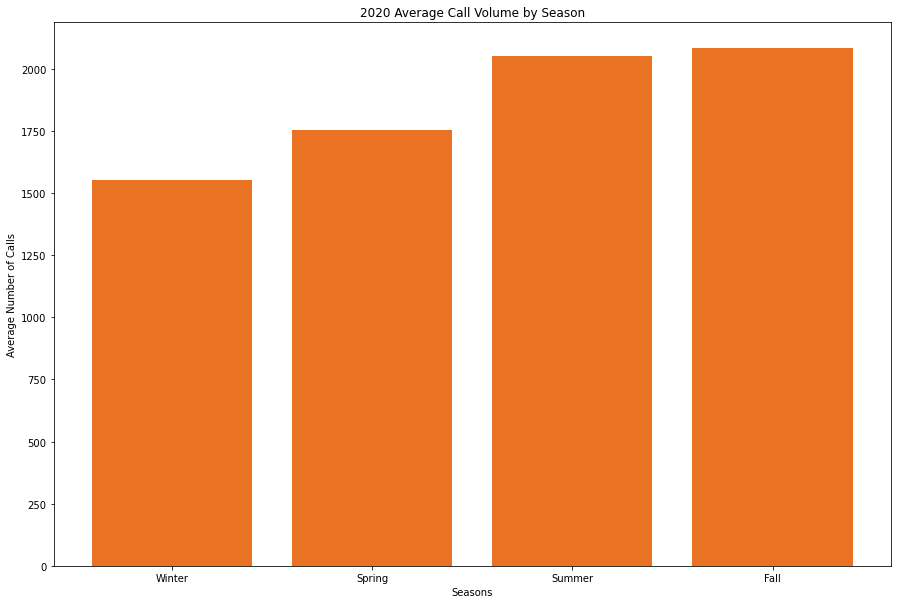

In [92]:
data = seasons_df.sort_values('Avg_Num_Calls')
plt.bar('Season', 'Avg_Num_Calls', data = data, color='#e97223')
#plt.xticks(rotation = 70)
plt.xlabel('Seasons')
plt.ylabel('Average Number of Calls')
plt.title('2020 Average Call Volume by Season')
plt.savefig('avg_calls_seasons.png');

### Created dataframe for the call counts in Other States

In [93]:
crisis_other_states.head()

,CallReportNum,StateProvince,Date,Time,Month,Day,Year,Month_Num
1907,69564571,IN,1/3/2020,14:17,Jan,3,2020,1
1876,70183991,OR,1/23/2020,13:58,Jan,23,2020,1
1875,70206989,CA,1/24/2020,9:38,Jan,24,2020,1
1874,70223920,WI,1/24/2020,19:28,Jan,24,2020,1
1873,70224193,KY,1/24/2020,19:46,Jan,24,2020,1


In [94]:
other_state_di = {}
for i in crisis_other_states['StateProvince']:
    if i in other_state_di.keys():
        other_state_di[i] += 1
    else:
        other_state_di[i] = 1
other_state_di

{'IN': 57,
 'OR': 37,
 'CA': 52,
 'WI': 350,
 'KY': 111,
 'TX': 227,
 'OK': 42,
 'FL': 85,
 'AL': 39,
 'NY': 30,
 nan: 58,
 'IL': 35,
 'NV': 31,
 'MS': 98,
 'BC': 15,
 'MI': 13,
 'GA': 74,
 'MO': 8,
 'ID': 2,
 'MN': 132,
 'MD': 14,
 'CO': 8,
 'OH': 23,
 'WA': 12,
 'NC': 15,
 'LA': 7,
 'NJ': 19,
 'VA': 20,
 'ND': 1,
 'CT': 5,
 'SC': 3,
 'AZ': 15,
 'WY': 58,
 'AR': 4,
 'MA': 12,
 'PA': 26,
 'NH': 1,
 'HI': 2,
 'IA': 3,
 'KS': 117,
 'NE': 23,
 'WV': 3,
 'ME': 1,
 'QC': 1,
 'AK': 4,
 'NM': 8,
 'PR': 1,
 'UT': 1,
 'MT': 2,
 'RI': 3}

In [95]:
other_states_calls = pd.DataFrame(other_state_di, index=[0])
other_states_calls

,IN,OR,CA,WI,KY,TX,OK,FL,AL,NY,...,NE,WV,ME,QC,AK,NM,PR,UT,MT,RI
0,57,37,52,350,111,227,42,85,39,30,...,23,3,1,1,4,8,1,1,2,3


In [96]:
other_states_calls = other_states_calls.T.reset_index()

In [97]:
other_states_calls

,index,0
0,IN,57
1,OR,37
2,CA,52
3,WI,350
4,KY,111
5,TX,227
6,OK,42
7,FL,85
8,AL,39
9,NY,30


In [98]:
other_states_calls = other_states_calls.rename(columns = {'index': 'StateProvince', 0:'number_calls'})

In [99]:
other_states_calls = other_states_calls.sort_values(['number_calls'], ascending=False)
other_states_calls

,StateProvince,number_calls
3,WI,350
5,TX,227
19,MN,132
39,KS,117
4,KY,111
13,MS,98
7,FL,85
16,GA,74
10,NaN,58
32,WY,58
